In [3]:
!pip install seaborn

In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
dir(sm)


['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MICE',
 'MICEData',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PCA',
 'PHReg',
 'Poisson',
 'ProbPlot',
 'Probit',
 'QuantReg',
 'RLM',
 'RecursiveLS',
 'SurvfuncRight',
 'WLS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_constant',
 'categorical',
 'cov_struct',
 'datasets',
 'distributions',
 'duration',
 'emplike',
 'families',
 'formula',
 'genmod',
 'graphics',
 'iolib',
 'load',
 'nonparametric',
 'qqline',
 'qqplot',
 'qqplot_2samples',
 'regression',
 'robust',
 'show_versions',
 'stats',
 'test',
 'tools',
 'tsa',
 'version',
 'webdoc']

In [5]:
dir(sm.tsa)


['AR',
 'ARIMA',
 'ARMA',
 'ArmaProcess',
 'DynamicFactor',
 'DynamicVAR',
 'MarkovAutoregression',
 'MarkovRegression',
 'SARIMAX',
 'SVAR',
 'UnobservedComponents',
 'VAR',
 'VARMAX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acf',
 'acovf',
 'add_lag',
 'add_trend',
 'adfuller',
 'arma_generate_sample',
 'arma_order_select_ic',
 'bds',
 'ccf',
 'ccovf',
 'coint',
 'datetools',
 'detrend',
 'filters',
 'graphics',
 'interp',
 'kpss',
 'lagmat',
 'lagmat2ds',
 'pacf',
 'pacf_ols',
 'pacf_yw',
 'periodogram',
 'q_stat',
 'seasonal_decompose',
 'statespace',
 'stattools',
 'tsatools',
 'var',
 'x13_arima_analysis',
 'x13_arima_select_order']

In [7]:
dir(sm.tsa.SARIMAX)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_conditional_sum_squares',
 '_forecasts_error_partial_derivatives',
 '_get_dates_loc',
 '_get_exog_names',
 '_get_init_kwds',
 '_get_model_names',
 '_get_predict_end',
 '_get_predict_start',
 '_handle_data',
 '_hessian_complex_step',
 '_hessian_finite_difference',
 '_hessian_oim',
 '_hessian_opg',
 '_init_dates',
 '_make_predict_dates',
 '_score_complex_step',
 '_score_finite_difference',
 '_score_harvey',
 '_score_obs_harvey',
 '_set_exog_names',
 '_set_predict_start_date',
 '_str_to_date',
 'endog_names',
 'exog_names',
 'filter',
 'fit',
 'from_formula',
 'hessian',
 'impulse_responses',
 'information',
 'in

In [8]:
df=pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/AirPassengers.csv")


In [9]:
df=df.drop('Unnamed: 0',1)


In [10]:
df.head()


,time,AirPassengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [11]:
df.tail()


,time,AirPassengers
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [12]:
df.shape[0]


144

In [13]:
df.shape

(144, 2)

In [14]:

start = datetime.datetime.strptime("1949-01-01", "%Y-%m-%d")
print(start)

1949-01-01 00:00:00


In [15]:
date_list = [start + relativedelta(months=x) for x in range(0,df.shape[0])]
print(date_list[0:4])

[datetime.datetime(1949, 1, 1, 0, 0), datetime.datetime(1949, 2, 1, 0, 0), datetime.datetime(1949, 3, 1, 0, 0), datetime.datetime(1949, 4, 1, 0, 0)]


In [16]:
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None

In [17]:
df.head()


,time,AirPassengers
1949-01-01,1949.000000,112
1949-02-01,1949.083333,118
1949-03-01,1949.166667,132
1949-04-01,1949.250000,129
1949-05-01,1949.333333,121


In [18]:
df=df.drop('time',1)
df.head()

,AirPassengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
df['AirPassengers'] = df.AirPassengers.apply(lambda x: int(x)*1000)


In [24]:
df.head()

,AirPassengers
1949-01-01,112000
1949-02-01,118000
1949-03-01,132000
1949-04-01,129000
1949-05-01,121000


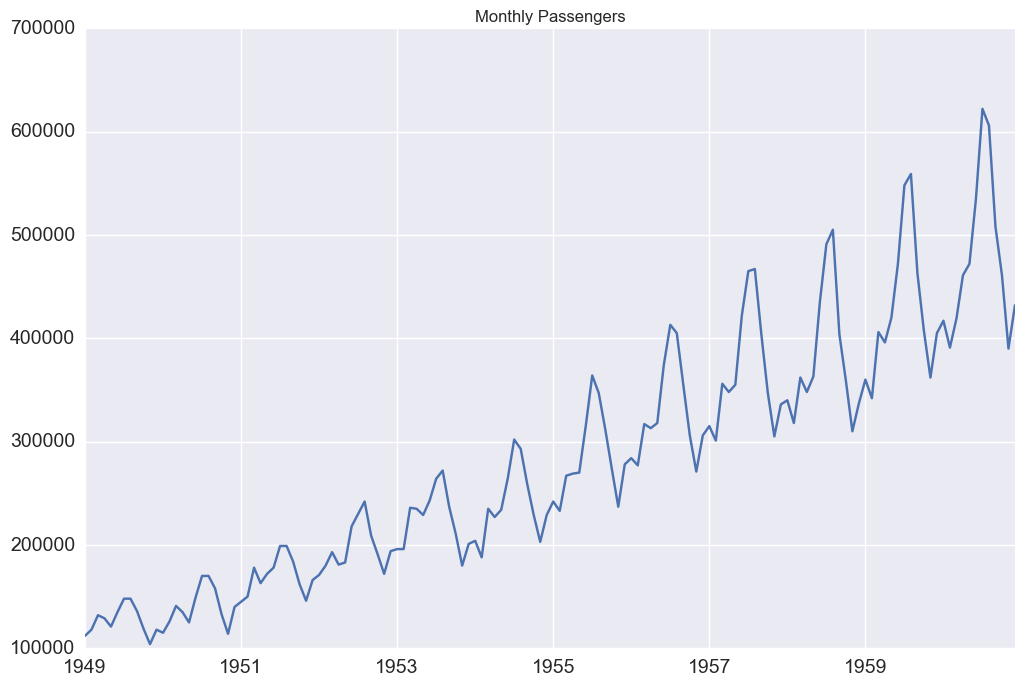

In [22]:
df.AirPassengers.plot(figsize=(12,8), title= 'Monthly Passengers', fontsize=14)
plt.savefig('month_ridership.png', bbox_inches='tight')

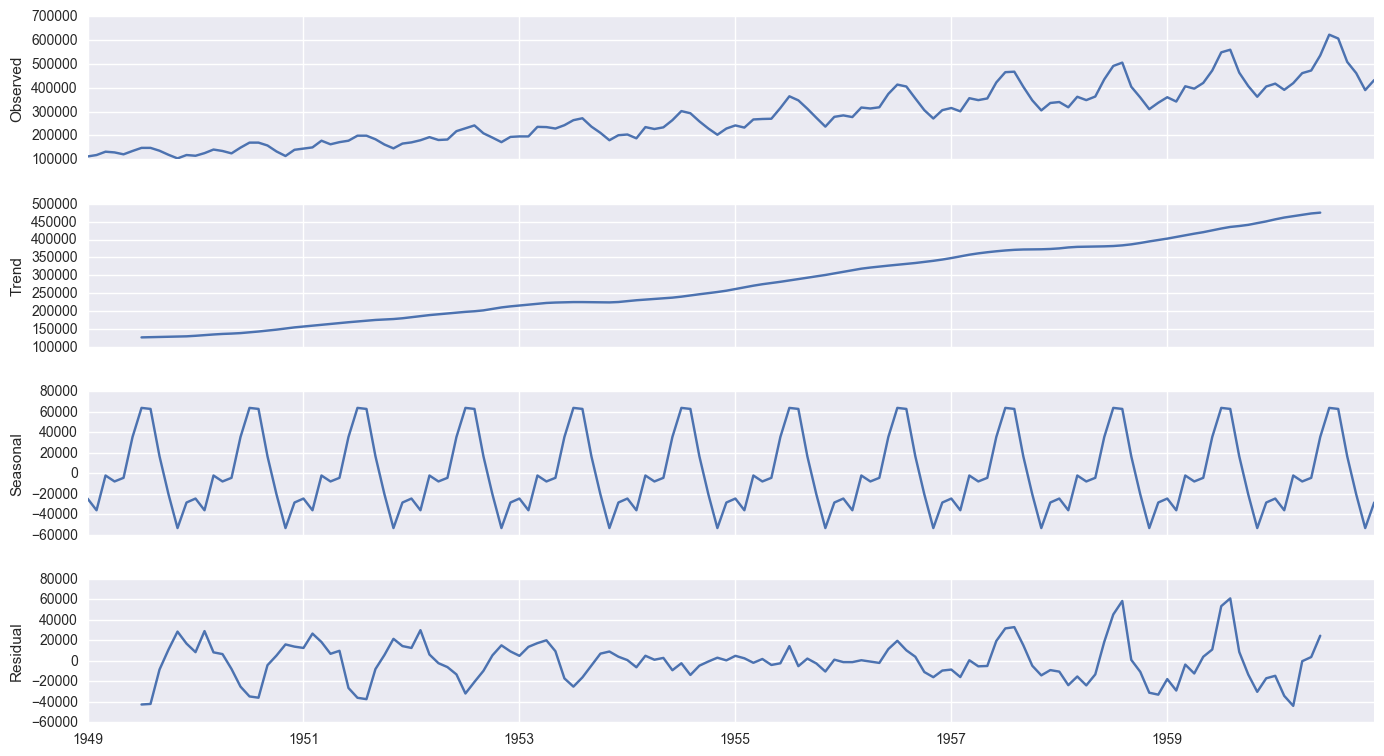

In [23]:

decomposition = seasonal_decompose(df.AirPassengers, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [25]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
print(p)

range(0, 2)


In [27]:
import itertools
import warnings

In [28]:
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [29]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
y=df


In [31]:
#warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3618.0303991426763
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2824.7439963684233
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2942.2733127230185
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2922.178151133141
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2767.105066400224
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2691.233398643673
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3890.816777796087
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3541.1171286722
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3028.8377323188824
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2746.77973129136
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3583.523640623017
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3531.2937768990187
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2781.198675746594
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2720.7023088205974
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3029.089945668332
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2568.2832251221016
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2841.315781459511
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2815.4011044132576
ARIMA

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2839.809192263449
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2588.50367175184
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2993.4630440139595
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2995.049216326931
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2588.2463284315304
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2592.80110502723
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:3352.0350133621478
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:3006.5493366627807
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2810.6423724894516
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2559.584031948852
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2981.2250436794675
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2959.3142304724834
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2579.8245645892207
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2563.13922589258
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:3354.7462930846423
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3006.702997636003
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2809.3844175191666
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2558.484602766447
ARI

In [32]:

warnings.filterwarnings("ignore") # specify to ignore warning messages
c3=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            c3.append( results.aic)
        except:
            continue

In [33]:
c3

[3618.0303991426763,
 2824.7439963684233,
 2942.2733127230185,
 2922.178151133141,
 2767.1050664002241,
 2691.2333986436729,
 3890.8167777960871,
 3541.1171286722001,
 3028.8377323188824,
 2746.7797312913599,
 3583.5236406230169,
 3531.2937768990187,
 2781.1986757465938,
 2720.7023088205974,
 3029.0899456683319,
 2568.2832251221016,
 2841.3157814595111,
 2815.4011044132576,
 2588.5333865135872,
 2569.9453272483315,
 3327.5177587522303,
 2984.7167061123341,
 2789.1285421540429,
 2537.0293659293943,
 2984.4555708516436,
 2939.4609583744718,
 2578.7862352774437,
 2537.7714842292648,
 3391.5248913820797,
 3038.1420742812679,
 2839.8091922634489,
 2588.5036717518401,
 2993.4630440139595,
 2995.0492163269309,
 2588.2463284315304,
 2592.8011050272298,
 3352.0350133621478,
 3006.5493366627807,
 2810.6423724894516,
 2559.584031948852,
 2981.2250436794675,
 2959.3142304724834,
 2579.8245645892207,
 2563.1392258925798,
 3354.7462930846423,
 3006.7029976360031,
 2809.3844175191666,
 2558.484602766

In [36]:
len(c3)

60

In [34]:
 index_min = np.argmin(c3)

In [35]:
index_min

23

In [37]:
from statsmodels.tsa.x13 import x13_arima_select_order


In [38]:
mod = sm.tsa.statespace.SARIMAX(df.AirPassengers, trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      AirPassengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1413.963
Date:                            Mon, 29 May 2017   AIC                           2833.926
Time:                                    20:35:50   BIC                           2842.835
Sample:                                01-01-1949   HQIC                          2837.546
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2174      0.054     -4.011      0.000      -0.324      -0.111
ma.S.L12      -0.1069      0.094   

In [39]:
results.predict(start=138,end=154)


1960-07-01    606873.955870
1960-08-01    629882.608813
1960-09-01    515108.700644
1960-10-01    454595.480491
1960-11-01    414268.710944
1960-12-01    436615.191517
1961-01-01    445967.930514
1961-02-01    420788.308017
1961-03-01    452420.585549
1961-04-01    488822.325998
1961-05-01    501099.437177
1961-06-01    563144.145745
1961-07-01    648722.910934
1961-08-01    635628.280420
1961-09-01    537833.345343
1961-10-01    489983.278061
1961-11-01    421727.227980
Freq: MS, dtype: float64

In [43]:
df2=pd.DataFrame(results.predict(start=0,end=154))

In [44]:
df2


,0
1949-01-01,0.000000
1949-02-01,89058.777560
1949-03-01,111769.729264
1949-04-01,127635.153436
1949-05-01,128705.492363
1949-06-01,122662.705144
1949-07-01,132337.835494
1949-08-01,144620.388881
1949-09-01,147270.741198
1949-10-01,138432.021594


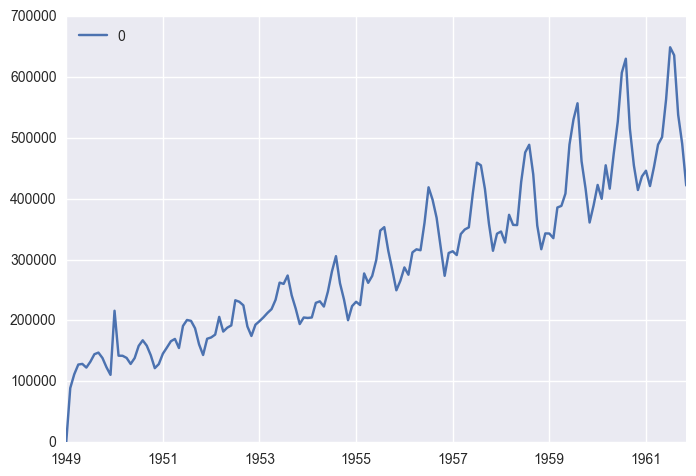

In [45]:
df2.plot()

In [46]:
aus=pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/austres.csv ")


In [48]:
aus=aus.drop('Unnamed: 0',1)


In [49]:
aus.head()


,time,austres
0,1971.25,13067.3
1,1971.50,13130.5
2,1971.75,13198.4
3,1972.00,13254.2
4,1972.25,13303.7


In [52]:
start = datetime.datetime.strptime("1971-03-31", "%Y-%m-%d")
print(start)

1971-03-31 00:00:00


In [53]:
date_list = [start + relativedelta(months=x) for x in range(0,3*aus.shape[0])]


In [54]:
date_list

[datetime.datetime(1971, 3, 31, 0, 0),
 datetime.datetime(1971, 4, 30, 0, 0),
 datetime.datetime(1971, 5, 31, 0, 0),
 datetime.datetime(1971, 6, 30, 0, 0),
 datetime.datetime(1971, 7, 31, 0, 0),
 datetime.datetime(1971, 8, 31, 0, 0),
 datetime.datetime(1971, 9, 30, 0, 0),
 datetime.datetime(1971, 10, 31, 0, 0),
 datetime.datetime(1971, 11, 30, 0, 0),
 datetime.datetime(1971, 12, 31, 0, 0),
 datetime.datetime(1972, 1, 31, 0, 0),
 datetime.datetime(1972, 2, 29, 0, 0),
 datetime.datetime(1972, 3, 31, 0, 0),
 datetime.datetime(1972, 4, 30, 0, 0),
 datetime.datetime(1972, 5, 31, 0, 0),
 datetime.datetime(1972, 6, 30, 0, 0),
 datetime.datetime(1972, 7, 31, 0, 0),
 datetime.datetime(1972, 8, 31, 0, 0),
 datetime.datetime(1972, 9, 30, 0, 0),
 datetime.datetime(1972, 10, 31, 0, 0),
 datetime.datetime(1972, 11, 30, 0, 0),
 datetime.datetime(1972, 12, 31, 0, 0),
 datetime.datetime(1973, 1, 31, 0, 0),
 datetime.datetime(1973, 2, 28, 0, 0),
 datetime.datetime(1973, 3, 31, 0, 0),
 datetime.datetime(

In [56]:
c2=[]
for i in range(0,3*len(aus),3):
    c2.append(date_list[i])

In [57]:
c2

[datetime.datetime(1971, 3, 31, 0, 0),
 datetime.datetime(1971, 6, 30, 0, 0),
 datetime.datetime(1971, 9, 30, 0, 0),
 datetime.datetime(1971, 12, 31, 0, 0),
 datetime.datetime(1972, 3, 31, 0, 0),
 datetime.datetime(1972, 6, 30, 0, 0),
 datetime.datetime(1972, 9, 30, 0, 0),
 datetime.datetime(1972, 12, 31, 0, 0),
 datetime.datetime(1973, 3, 31, 0, 0),
 datetime.datetime(1973, 6, 30, 0, 0),
 datetime.datetime(1973, 9, 30, 0, 0),
 datetime.datetime(1973, 12, 31, 0, 0),
 datetime.datetime(1974, 3, 31, 0, 0),
 datetime.datetime(1974, 6, 30, 0, 0),
 datetime.datetime(1974, 9, 30, 0, 0),
 datetime.datetime(1974, 12, 31, 0, 0),
 datetime.datetime(1975, 3, 31, 0, 0),
 datetime.datetime(1975, 6, 30, 0, 0),
 datetime.datetime(1975, 9, 30, 0, 0),
 datetime.datetime(1975, 12, 31, 0, 0),
 datetime.datetime(1976, 3, 31, 0, 0),
 datetime.datetime(1976, 6, 30, 0, 0),
 datetime.datetime(1976, 9, 30, 0, 0),
 datetime.datetime(1976, 12, 31, 0, 0),
 datetime.datetime(1977, 3, 31, 0, 0),
 datetime.datetime(

In [59]:
aus['index'] =c2
aus.set_index(['index'], inplace=True)
aus.index.name=None

In [60]:
aus.head()

,time,austres
1971-03-31,1971.25,13067.3
1971-06-30,1971.50,13130.5
1971-09-30,1971.75,13198.4
1971-12-31,1972.00,13254.2
1972-03-31,1972.25,13303.7


In [61]:
aus=aus.drop('time',1)


In [62]:
y=aus

In [63]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
c4=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1640.498695405866
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:957.7157324475122
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:901.8737542488778
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:893.4970589310027
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:821.5535708474058
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:789.9330545732091
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1866.0471769096082
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3925.760426368583
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1086.733456078065
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:917.9195061799221
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:808.5017824725799
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1543.673635439925
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:742.4302886984069
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:722.8237967086055
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:751.9874335168838
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:518.4115822594365
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:642.4135683750286
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:618.5002080638922
ARIMA(0, 

In [64]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
c3=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            c3.append( results.aic)
        except:
            continue

In [65]:
c3


[1640.4986954058661,
 957.71573244751221,
 901.87375424887784,
 893.4970589310027,
 821.55357084740581,
 789.93305457320912,
 1866.0471769096082,
 3925.760426368583,
 1086.733456078065,
 917.91950617992211,
 808.50178247257986,
 1543.673635439925,
 742.43028869840691,
 722.82379670860553,
 751.98743351688381,
 518.4115822594365,
 642.4135683750286,
 618.50020806389216,
 531.38051643921392,
 523.48167503075365,
 840.87355439369594,
 682.12788229642797,
 603.90993074768664,
 495.84228639190968,
 617.59430054426139,
 591.2669779528502,
 513.49418801156492,
 499.32742555121882,
 693.36936463628911,
 602.5140387938435,
 645.00191665951104,
 547.3449848000671,
 602.45564704084461,
 624.56385597318842,
 531.27831343560479,
 533.55468590383157,
 666.27776765833471,
 580.98178505458884,
 612.61949036919236,
 521.68920132707319,
 587.60903243331552,
 591.71459433261055,
 528.26901488150293,
 522.79352219688167,
 672.92567709976049,
 585.91491987589393,
 583.45887689915185,
 488.78715262100093,
 

In [66]:
index_min = np.argmin(c3)


In [67]:
index_min

55

In [68]:
c3[index_min]


477.45261483171817

In [ ]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:477.45261483171817


In [69]:
from statsmodels.tsa.x13 import x13_arima_select_order


In [71]:
order1=c4[index_min][6:13]
order1

'1, 1, 1'

In [72]:
order1=[int(s) for s in order1.split(',')]
order1

[1, 1, 1]

In [73]:
seasonal_order1=c4[index_min][16:27]
seasonal_order1

'0, 1, 1, 12'

In [74]:
seasonal_order1=[int(s) for s in seasonal_order1.split(',')]
seasonal_order1

[0, 1, 1, 12]

In [76]:
mod = sm.tsa.statespace.SARIMAX(y.austres, trend='n', order=order1, seasonal_order=seasonal_order1)


In [77]:
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            austres   No. Observations:                   89
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -283.908
Date:                            Mon, 29 May 2017   AIC                            575.816
Time:                                    20:52:06   BIC                            585.771
Sample:                                03-31-1971   HQIC                           579.829
                                     - 03-31-1993                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9163      0.066     13.797      0.000       0.786       1.047
ma.L1         -0.4557      0.139   

In [78]:
results.predict(start=78,end=99)


1990-09-30    17154.504726
1990-12-31    17232.721671
1991-03-31    17292.787820
1991-06-30    17356.532926
1991-09-30    17416.677379
1991-12-31    17478.884490
1992-03-31    17483.140550
1992-06-30    17521.456437
1992-09-30    17573.650282
1992-12-31    17618.031624
1993-03-31    17673.833098
1993-06-30    17686.742802
1993-09-30    17735.686265
1993-12-31    17793.317610
1994-03-31    17836.466110
1994-06-30    17890.975226
1994-09-30    17944.622703
1994-12-31    17986.865712
1995-03-31    18023.737569
1995-06-30    18066.224321
1995-09-30    18111.537395
1995-12-31    18166.767228
Freq: Q-DEC, dtype: float64

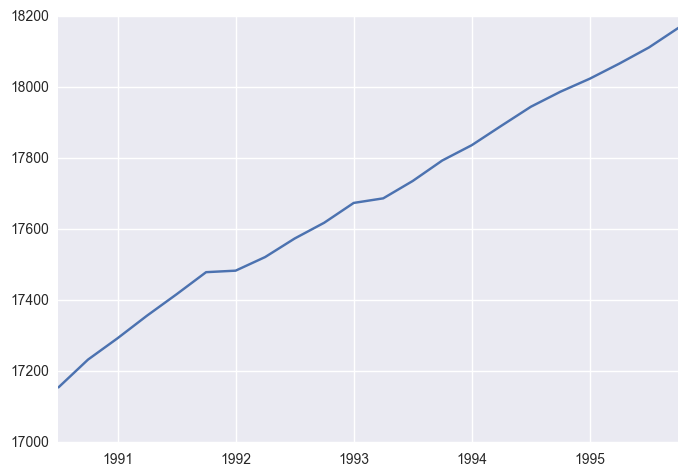

In [79]:
results.predict(start=78,end=99).plot()
